In [2]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [19]:
# state graph definition
class BmiInput(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float  # Body Mass Index
    category : str  # temporary field for intermediate calculations

In [26]:
# function to calculate BMI
def calBmi(input: BmiInput) -> BmiInput:
    """
    Calculate the Body Mass Index (BMI) based on height and weight.
    """
    height = input['height']
    weight = input['weight']
    
    if height <= 0:
        raise ValueError("Height must be greater than zero.")
    
    bmi = weight / (height ** 2)
    input['bmi'] = bmi
    return input

def cal_category(input: BmiInput) -> BmiInput:
    bmi = input['bmi']
    print("-----", bmi)
     # Determine BMI category
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    
    input['category'] = category
    return input
    

In [27]:
# define the state graph
graph = StateGraph(BmiInput)
# add nodes 
graph.add_node('calculate_bmi', calBmi)
graph.add_node('determine_category', cal_category)
# add edges
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'determine_category')
graph.add_edge('determine_category', END)
# compile the graph into a workflow
workflow = graph.compile()

In [28]:
# this take state and also return state
workflow.invoke({
    'height': 1.75,  # Example height in meters
    'weight': 100.0   # Example weight in kilograms
})

----- 32.6530612244898


{'height': 1.75,
 'weight': 100.0,
 'bmi': 32.6530612244898,
 'category': 'Obesity'}

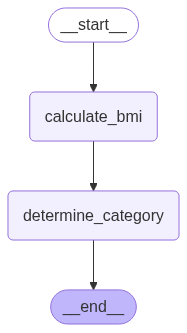

In [11]:
workflow